In [57]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, adam
import numpy as np

In [58]:
'''
I = []
a = 0
I.append(a)
for i in range(10):
    a += 0.01
    I.append(a)
print("I = ", I)
'''
I = np.zeros([11, 1])
tmp = 0
for i in range(len(I)):
    I[i] = tmp
    tmp += 0.01
print("I = ", I)

nor_I = np.zeros([len(I), 1])
for i in range(len(I)):
    nor_I[i] = ((I[i]-min(I))/(max(I)-min(I)))
    #print(I[i])
print("normalize I = ", nor_I)

print("shape of noralize I:",nor_I.shape)

I =  [[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]
 [0.07]
 [0.08]
 [0.09]
 [0.1 ]]
normalize I =  [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
shape of noralize I: (11, 1)


In [59]:
V = [20, 58, 88, 109, 130, 146, 162, 177, 187, 196, 201]
V = np.array(V)
V = V.reshape(11,1)
#print(V.shape)
print("V = ", V)

nor_V = np.zeros([len(V), 1])
for i in range(len(V)):
    nor_V[i] = ((V[i]-min(V))/(max(V)-min(V)))
print("normalize V = ", nor_V)
print("shape of noralize V:",nor_V.shape)

V =  [[ 20]
 [ 58]
 [ 88]
 [109]
 [130]
 [146]
 [162]
 [177]
 [187]
 [196]
 [201]]
normalize V =  [[0.        ]
 [0.20994475]
 [0.37569061]
 [0.49171271]
 [0.60773481]
 [0.6961326 ]
 [0.78453039]
 [0.86740331]
 [0.92265193]
 [0.97237569]
 [1.        ]]
shape of noralize V: (11, 1)


In [60]:
model = Sequential()
model.add(Dense(input_dim=1*1, units=10, activation='tanh'))
#model.add(Dense(units=10, activation='tanh'))
for i in range(3):
    model.add(Dense(input_dim=1*1, units=10, activation='tanh'))
model.add(Dense(units=1, activation='tanh'))

In [61]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])
#for i in range(len(nor_I)):
    #model.fit(np.array(nor_I[i]), np.array(nor_V[i]), batch_size=1, epochs=20)

model.fit(nor_I, nor_V, batch_size=1, epochs=100)
res = model.evaluate(nor_I, nor_V, batch_size=1)
print('\nTraining accuracy:', res[1])

Epoch 1/100
11/11 [==============================] - 0s 21ms/step - loss: 0.1351 - acc: 0.1818
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0529 - acc: 0.1818
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - acc: 0.1818
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0350 - acc: 0.1818
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0311 - acc: 0.1818
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0280 - acc: 0.1818
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0252 - acc: 0.1818
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0224 - acc: 0.1818
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0203 - acc: 0.1818
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0181 - acc: 0.1818
Epoch 11/100
11/11 [==============================] - 0s 1

11/11 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.1818    
Epoch 87/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.1818
Epoch 88/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818    
Epoch 89/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.1818
Epoch 90/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 0.1818
Epoch 91/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818    
Epoch 92/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818    
Epoch 93/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818
Epoch 94/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818
Epoch 95/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0026 - acc: 0.1818    
Epoch 96/100
11/11 [=======================

In [62]:
#test_I = np.array([1,1])
#test_I = (test_I-min(I))/(max(I)-min(I))
#print(test_I)

pred = model.predict(nor_I)
ans = pred*(max(V)-min(V))+min(V)
print("res = ", ans)
print("actual res = ", np.array(V))

res =  [[ 16.27177786]
 [ 53.64053199]
 [ 88.37187243]
 [117.08977377]
 [138.75708389]
 [154.17348516]
 [164.83585215]
 [172.16784906]
 [177.25311005]
 [180.83837861]
 [183.41667569]]
actual res =  [[ 20]
 [ 58]
 [ 88]
 [109]
 [130]
 [146]
 [162]
 [177]
 [187]
 [196]
 [201]]


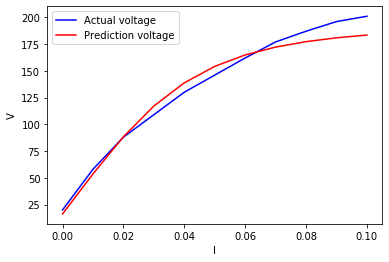

In [63]:
from matplotlib import pyplot as plt

plt.xlabel('I')
plt.ylabel('V')

#plt.plot(I,V,'b')
#plt.show
line1 = plt.plot(I, V, color='blue', label='Actual voltage')

#plt.plot(I,ans,'r')
line2 = plt.plot(I, ans, color='red', label='Prediction voltage')

plt.show
plt.legend(loc='upper left')
